<a href="https://colab.research.google.com/github/basmala-kamal/tut-pricing-model/blob/main/tutfirstkmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install requests beautifulsoup4


In [4]:
import requests
from bs4 import BeautifulSoup


In [5]:
import json
import pandas as pd
import re

# 1. Load the JSON file
with open("body+splash.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to a pandas DataFrame for easier data manipulation
df = pd.DataFrame(data)
df = df.dropna(subset=["price", "rating"])
import time


# Define the function to scrape the brand name
def scrape_brand_name(session, url):
    try:
        if not url or not url.startswith("http"):  # Validate URL
            return None

        # Send a GET request to the URL using the session
        response = session.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for HTTP issues

        # Parse the page content with BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Adjust this selector based on the actual structure of the webpage
        brand_tag = soup.find("tr", class_="a-spacing-small po-brand")
        if brand_tag:
            td_tag = brand_tag.find("td", class_="a-span9")
            if td_tag:
                span_tag = td_tag.find("span", class_="a-size-base po-break-word")
                if span_tag:
                    return span_tag.get_text(strip=True)

        # Return None if the brand name is not found
        return None

    except requests.exceptions.RequestException as e:
        print(f"Network error scraping {url}: {e}")
        return None
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None

# Load the JSON file


# Ensure the 'link' column exists and is valid
if "link" in df.columns:
    # Create a requests session
    with requests.Session() as session:
        # Set a User-Agent header to mimic a browser (optional but recommended)
        session.headers.update({
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
        })

        # Apply the scraping function to the 'link' column
        brand_names = []
        for idx, url in enumerate(df["link"]):
            print(f"Scraping {idx + 1}/{len(df)}: {url}")
            brand_name = scrape_brand_name(session, url)
            brand_names.append(brand_name)

            # Throttle requests to avoid getting blocked
            time.sleep(2)

        # Add the scraped brand names to the DataFrame
        df["brand_name"] = brand_names
# ------------------------------------------------------------------------------
# 2. Extract numeric price

# Example price format: "‏9.50 ريال" or "‏18.95 ريال"
# Strategy: remove any non-digit or non-dot characters, then convert to float.
def clean_price(price_str):
    if price_str is None:
        return None  # Return None if the value is missing
    # Remove all characters except digits and dots
    numeric_str = re.sub(r"[^\d\.]", "", price_str)
    try:
        return float(numeric_str)
    except ValueError:
        return None

df["price_numeric"] = df["price"].apply(clean_price)

# ------------------------------------------------------------------------------
# 3. Extract numeric rating

# Example rating format: "4.2 من 5 نجوم"
# Strategy: remove all characters except digits and dots and convert to float.
def clean_rating(rating_str):
    if rating_str is None:
        return None  # Return None if the value is missing

    # Match a floating-point number at the beginning of the string
    match = re.search(r"\d+(\.\d+)?", rating_str)
    if match:
        try:
            return float(match.group(0))  # Extract and convert the match to float
        except ValueError:
            return None
    return None


df["rating_numeric"] = df["rating"].apply(clean_rating)

# ------------------------------------------------------------------------------
# 4. Extract volume from the title
# We assume the title might contain something like "750 مل" or "400 مل".
# We only want the digits, e.g., 750 or 400.

def extract_volume(title_str):
    # Look for one or more digits followed by optional spaces then "مل"
    match = re.search(r"(\d+)\s*مل", title_str)
    if match:
        return float(match.group(1))
    return None

df["volume"] = df["title"].apply(extract_volume)

# ------------------------------------------------------------------------------
# Final cleaned DataFrame
print(df)


Scraping 1/241: https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A7%D8%B2%D8%A7%D9%86%D9%88%D9%81%D8%A7-%D8%A8%D9%84%D9%88-%D9%81%D8%A7%D9%86%D9%8A%D9%84%D8%A7-%D9%81%D8%B1%D9%86%D8%B3%D9%8A%D9%87/dp/B083B1CDNC
Scraping 2/241: https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A7%D8%B2%D8%A7%D9%86%D9%88%D9%81%D8%A7-%D8%A8%D9%84%D9%88-%D9%81%D8%A7%D9%86%D9%8A%D9%84%D8%A7-%D9%81%D8%B1%D9%86%D8%B3%D9%8A%D9%87/dp/B083B1CDNC
Scraping 3/241: https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A7%D8%B2%D8%A7%D9%86%D9%88%D9%81%D8%A7-%D8%A8%D9%84%D9%88-%D9%81%D8%A7%D9%86%D9%8A%D9%84%D8%A7-%D9%81%D8%B1%D9%86%D8%B3%D9%8A%D9%87/dp/B083B1CDNC
Scraping 4/241: https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A7%D8%B2%D8%A7%D9%86%D9%88%D9%81%D8%A7-%D8%A8%D9%84%D9%88-%D9%81%D8%A7%D9%86%D9%8A%D9%84%D8%A7-%D9%81%D8%B1%D9%86%D8%B3%D9%8A%D9%87/dp/B083B1CDNC
Scraping 5/241: https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A7%D8%B2%D8%A7%D9%86%D9%88%D9%81%D8%A7-%D8%A8%D9%84%D9%88-%D9%81%D8%A7%D9%86%D9%8A%D9%84%D8%A7-%D9%81%D8%B1%D9%

In [6]:
df

,title,price,rating,link,brand_name,price_numeric,rating_numeric,volume
0,جي .كازانوفا بلو بخاخ معطر للجسم برئحة فانيلا ...,‏21.00 ريال,4.2 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,None,21.00,4.2,235.0
1,سبلاش للجسم للرجال من بيور بيوتي 250 مل ماجيستيك,‏23.20 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,None,23.20,4.1,250.0
3,بودي سبلاش كاسانوفا، للجنسين، 235.0 ملليلتر,‏22.50 ريال,5.0 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,None,22.50,5.0,0.0
5,سبراي معطر للجسم من بودي فانتاسيز سيجنتشر - زه...,‏42.95 ريال,4.3 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,None,42.95,4.3,236.0
6,"جي .كازانوفا بلو بخاخ معطر للجسم برئحة تيزمي ,...",‏21.00 ريال,4.7 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,None,21.00,4.7,235.0
...,...,...,...,...,...,...,...,...
298,مزيل عرق ستيك كابتن رجالي من اولد سبايس لانتعا...,‏17.50 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,كوول اند كوول,17.50,4.1,50.0
299,عطر روز اوريجينال رول اون بدون كحول 9 مل، للجنسين,‏69.81 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,كوول اند كوول,69.81,4.1,9.0
303,ليرير سبلاش للجسم ماندرين تويست من ووتاجيرل، 1...,‏189.25 ريال,4.0 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,كوول اند كوول,189.25,4.0,135.0
304,ارماف بخاخ الجسم انشانتد رومانس للنساء 200 مل ...,‏99.00 ريال,3.9 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,كوول اند كوول,99.00,3.9,200.0


In [7]:
df_cleaned = (
    df[["title", "price_numeric", "rating_numeric", "volume"]]
    .dropna(subset=["title", "price_numeric", "rating_numeric","volume"])
)

df_cleaned.shape


(195, 4)

<Axes: xlabel='volume', ylabel='price_numeric'>

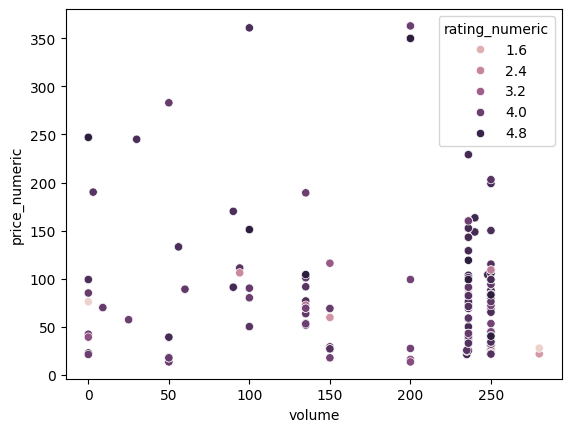

In [8]:
import seaborn as sns

sns.scatterplot(data = df_cleaned, x = 'volume', y = 'price_numeric', hue = 'rating_numeric')

In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd


df_cleaned["price_category"] = pd.cut(
    df_cleaned["price_numeric"],
    bins=[0, 50, 100, float("inf")],  # Example: Low (<50), Medium (50-100), High (>100)
    labels=["low", "medium", "high"]
)

# 2. Define features (X) and target (y)
X = df_cleaned[["volume", "rating_numeric"]]
y = df_cleaned["price_category"]

# 3. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [10]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [19]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

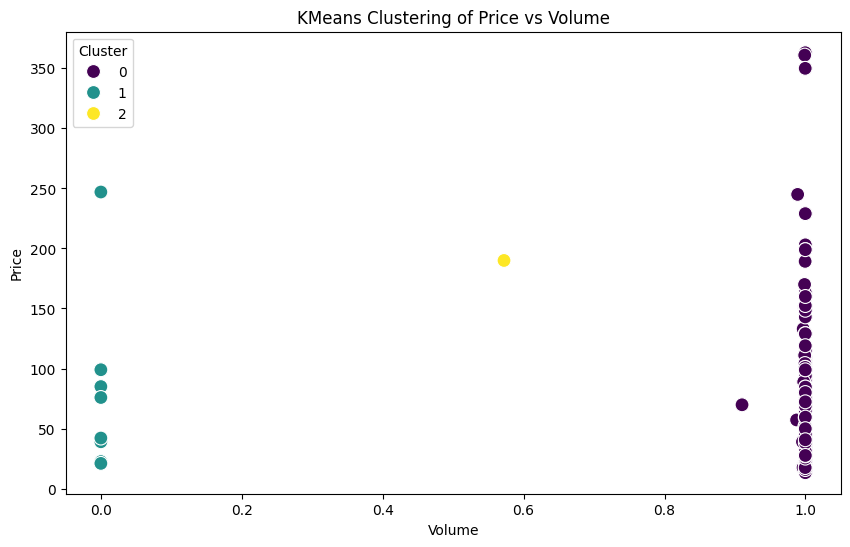

In [20]:
X_train_plot = pd.DataFrame(X_train_norm, columns=["volume", "rating_numeric"])  # Ensure correct column names
X_train_plot["price_numeric"] = df_cleaned.loc[X_train.index, "price_numeric"].values  # Add price column for plotting
X_train_plot["cluster"] = kmeans.labels_

# Plot the scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X_train_plot,
    x="volume",
    y="price_numeric",
    hue="cluster",
    palette="viridis",
    s=100
)
plt.title("KMeans Clustering of Price vs Volume")
plt.xlabel("Volume")
plt.ylabel("Price")
plt.legend(title="Cluster")
plt.show()